In [1]:
import pandas as pd
import numpy as np

import re

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

train = pd.read_csv(r'D:\Datasets\tabular-playground-series-apr-2021\train.csv')
test = pd.read_csv(r'D:\Datasets\tabular-playground-series-apr-2021\test.csv')
submission = pd.read_csv(r'D:\Datasets\tabular-playground-series-apr-2021\sample_submission.csv')

## Preprocessing

In [2]:
def ageImputer(Id):
    if data['Age'][Id] == 0:
        if (data['Pclass'][Id]==1) & (data['Sex'][Id]==0):
            return train[(train['Pclass']==1) & (train['Sex']==0)]['Age'].median()
        elif (data['Pclass'][Id]==1) & (data['Sex'][Id]==1):
            return train[(train['Pclass']==1) & (train['Sex']==1)]['Age'].median()
        elif (data['Pclass'][Id]==2) & (data['Sex'][Id]==0):
            return train[(train['Pclass']==2) & (train['Sex']==0)]['Age'].median()
        elif (data['Pclass'][Id]==2) & (data['Sex'][Id]==1):
            return train[(train['Pclass']==2) & (train['Sex']==1)]['Age'].median()
        elif (data['Pclass'][Id]==3) & (data['Sex'][Id]==0):
            return train[(train['Pclass']==1) & (train['Sex']==0)]['Age'].median()
        elif (data['Pclass'][Id]==3) & (data['Sex'][Id]==1):
            return train[(train['Pclass']==1) & (train['Sex']==1)]['Age'].median()
    else:
        return data['Age'][Id]

def fareImputer(Id):
    if data['Fare'][Id] == 0:
        if data['Pclass'][Id]==1:
            return train[train['Pclass']==1]['Fare'].mean()
        elif data['Pclass'][Id]==2:
            return train[train['Pclass']==2]['Fare'].mean()
        elif data['Pclass'][Id]==3:
            return train[train['Pclass']==3]['Fare'].mean()
    else:
        return data['Fare'][Id]

def cabin_map(x):
    if x in ["T", "G", "F"]:
        return "E"
    else:
        return x

for i, data in zip(['train', 'test'], [train, test]):
    # Sex
    data['Sex'] = pd.Categorical(data['Sex']).codes
    # Pclass
    data['Pclass'] = data['Pclass'].astype(np.uint8)
    # Age
    data['Age'] = data['Age'].fillna(0)
    tqdm.pandas(desc=f"{i} Age Imputation")
    data['Age'] = data.reset_index()['index'].progress_apply(ageImputer)
    # Parch/SibSp
    data['familySize'] = data['Parch'] + data['SibSp'] + 1
    data['isAlone'] = pd.Categorical(data['familySize']==0).codes
    # Fare
    data['Fare'] = data['Fare'].fillna(0)
    tqdm.pandas(desc=f"{i} Fare Imputation")
    data['Fare'] = data.reset_index()['index'].progress_apply(fareImputer)
    data['Fare'] = np.log1p(data['Fare'])
    # Cabin
    data['Cabin'] = data['Cabin'].fillna("M").str[0]
    data['Cabin'] = data['Cabin'].apply(cabin_map)
    # Embarked
    data['Embarked'] = data['Embarked'].fillna(train['Embarked'].mode()[0])
    # Name
    data['Name'] = data['Name'].str.split(', ', expand=True)[1]
    # Ticket
    data['Ticket'] = data['Ticket'].fillna('M').astype(str)
    for i in tqdm(data.reset_index()['index'], desc=f"{i} Ticket Discretization"):
        text = data['Ticket'][i]
        if re.findall(r"^(PC)", text) != []:
            data['Ticket'] = data['Ticket'].replace(text, "PC")
        elif re.findall(r"(A.|A/5.|A/4|A/4.|A4)", text) != []:
            data['Ticket'] = data['Ticket'].replace(text, "A")
        elif re.findall(r"(STON|SOTON)", text) != []:
            data['Ticket'] = data['Ticket'].replace(text, "SOTON")
        elif re.findall(r"(W./C.|W/C)", text) != []:
            data['Ticket'] = data['Ticket'].replace(text, "WC")   
        elif re.findall(r"(F.C.)", text) != []:
            data['Ticket'] = data['Ticket'].replace(text, "FCC") 
        elif re.findall(r"(SC|C|SO/C|S.O.C.|SCO)", text) != []:
            data['Ticket'] = data['Ticket'].replace(text, "SOC")
        elif re.findall(r"(S.W.|SW)", text) != []:
            data['Ticket'] = data['Ticket'].replace(text, "SW")
        elif re.findall(r"(S.O./P|S.P|S.O.P.|PP)", text) != []:
            data['Ticket'] = data['Ticket'].replace(text, "SOP")
        elif re.findall(r"(WE|W.E.P.)", text) != []:
            data['Ticket'] = data['Ticket'].replace(text, "WEP")
        elif re.findall(r"(Fa|FA)", text) != []:
            data['Ticket'] = data['Ticket'].replace(text, "FA")
        elif re.findall(r"(LP|Lp)", text) != []:
            data['Ticket'] = data['Ticket'].replace(text, "LP")
        elif re.findall(r"^[1][\d]{4}$", text) != []:
            data['Ticket'] = data['Ticket'].replace(text, "1xxxx")
        elif re.findall(r"^[1][\d]{5}$", text) != []:
            data['Ticket'] = data['Ticket'].replace(text, "1xxxxx")
        elif re.findall(r"^[2][\d]{4}$", text) != []:
            data['Ticket'] = data['Ticket'].replace(text, "2xxxx")
        elif re.findall(r"^[2][\d]{5}$", text) != []:
            data['Ticket'] = data['Ticket'].replace(text, "2xxxxx")  
        elif re.findall(r"^[3][\d]{3}$", text) != []:
            data['Ticket'] = data['Ticket'].replace(text, "3xxx")
        elif re.findall(r"^[3][\d]{4}$", text) != []:
            data['Ticket'] = data['Ticket'].replace(text, "3xxxx")
        elif re.findall(r"^[3][\d]{5}$", text) != []:
            data['Ticket'] = data['Ticket'].replace(text, "3xxxxx") 
        elif re.findall(r"^[3][\d]{6}$", text) != []:
            data['Ticket'] = data['Ticket'].replace(text, "3xxxxxx")
        elif re.findall(r"^[4][\d]{3}$", text) != []:
            data['Ticket'] = data['Ticket'].replace(text, "4xxx")
        elif re.findall(r"^[4][\d]{4}$", text) != []:
            data['Ticket'] = data['Ticket'].replace(text, "4xxxx")
        elif re.findall(r"^[4][\d]{5}$", text) != []:
            data['Ticket'] = data['Ticket'].replace(text, "4xxxxxx")
        elif re.findall(r"^[4][\d]{6}$", text) != []:
            data['Ticket'] = data['Ticket'].replace(text, "4xxxxxx")
        elif re.findall(r"^[5][\d]{3}$", text) != []:
            data['Ticket'] = data['Ticket'].replace(text, "5xxx")
        elif re.findall(r"^[5][\d]{4}$", text) != []:
            data['Ticket'] = data['Ticket'].replace(text, "5xxxx")
        elif re.findall(r"^[5][\d]{5}$", text) != []:
            data['Ticket'] = data['Ticket'].replace(text, "5xxxxx")
        elif re.findall(r"^[6][\d]{3}$", text) != []:
            data['Ticket'] = data['Ticket'].replace(text, "6xxx")
        elif re.findall(r"^[6][\d]{4}$", text) != []:
            data['Ticket'] = data['Ticket'].replace(text, "6xxxx")
        elif re.findall(r"^[7][\d]{3}$", text) != []:
            data['Ticket'] = data['Ticket'].replace(text, "7xxx")
        elif re.findall(r"^[7][\d]{4}$", text) != []:
            data['Ticket'] = data['Ticket'].replace(text, "7xxxx")
        elif re.findall(r"^[8][\d]{3}$", text) != []:
            data['Ticket'] = data['Ticket'].replace(text, "8xxx")
        elif re.findall(r"^[9][\d]{3}$", text) != []:
            data['Ticket'] = data['Ticket'].replace(text, "9xxx")
    ticket_bins = [0, 2500, 5000, 7500, 10000, 12500, 15000, 17500]
    data['TicketFreq'] = data['Ticket'].map(data['Ticket'].value_counts().to_dict())
    data['TicketFreq'] = pd.cut(data['TicketFreq'], ticket_bins, labels=range(len(ticket_bins)-1))

# Outliers
train = train[train['Fare']>=1]
for data in [train, test]:
    age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
    data['Age'] = pd.cut(data['Age'], age_bins, labels=range(len(age_bins)-1))

data = pd.concat([train, test], axis=0).reset_index(drop=True)
data.drop(['PassengerId'], axis=1, inplace=True)

# Label encode
for feature in ["Cabin", "Embarked", "Name"]:
    data[feature] = pd.Categorical(data[feature]).codes

# One-hot encode
data = pd.get_dummies(data, columns=["Sex", "Cabin", 'Ticket', "Embarked"])

train = data.iloc[:train.shape[0], :]
test = data.iloc[train.shape[0]:, :].reset_index(drop=True)
test.drop(["Survived"], axis=1, inplace=True)

print("train shape:", train.shape)
print("test shape:", test.shape)

train.to_csv("train_cleaned.csv", index=False)
test.to_csv("test_cleaned.csv", index=False)

train Age Imputation:   0%|          | 0/100000 [00:00<?, ?it/s]

train Fare Imputation:   0%|          | 0/100000 [00:00<?, ?it/s]

train Ticket Discretization:   0%|          | 0/100000 [00:00<?, ?it/s]

test Age Imputation:   0%|          | 0/100000 [00:00<?, ?it/s]

test Fare Imputation:   0%|          | 0/100000 [00:00<?, ?it/s]

test Ticket Discretization:   0%|          | 0/100000 [00:00<?, ?it/s]

train shape: (99993, 53)
test shape: (100000, 52)


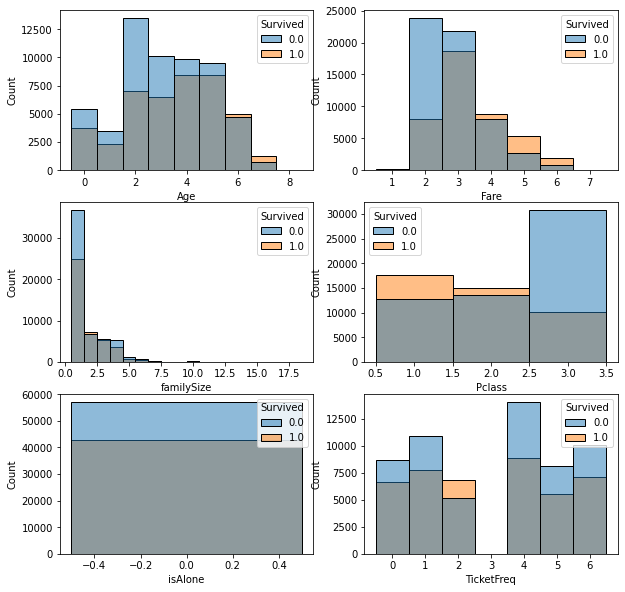

In [3]:
plt.figure(figsize=(10,10))
for i, feature in enumerate(['Age', 'Fare', 'familySize', 'Pclass', 'isAlone', 'TicketFreq']):
    plt.subplot(3, 2, i+1)
    sns.histplot(x=train[feature], hue=train['Survived'], discrete=True)

## Hyperparameter Tuning

Random Forest Classifier

|Features|Options|Default|Bounds|
|:-|:-:|:-:|:-:|
|n_estimators|Int|100|1 to 500|
|criterion|{"gini", "entropy"}|"gini"|0.0 to 1.0|
|max_depth|Int|None|2 to 100|
|min_samples_split|Int or float|2|2 to 10|
|min_samples_leaf|Int or float|1|1 to 10|
|min_weight_fraction_leaf|float|0.0|0.0 to 0.5|
|max_features|{"auto", "sqrt", "log2"}|"auto"|0.0 to 2.0|
|max_leaf_nodes|Int|None|2 to 100|
|min_impurity_decrease|Float|0.0|0.0 to 1.0|
|class_weight|{"balanced", "balanced_subsample"}|None|0.0 to 1.0|
|ccp_alpha|Float|0.0|0.0 to 1.0|
|max_samples|Int or float|None|0.0 to 1.0|

In [4]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from joblib import parallel_backend

class ForestGeneticTuning:
    NUM_FOLDS = 5

    def __init__(self, randomSeed):
        self.randomSeed = randomSeed
        self.init_data()
        self.skf = StratifiedKFold(
            n_splits=self.NUM_FOLDS,
            random_state=self.randomSeed,
            shuffle=True
        )

    def init_data(self):
        self.data = pd.read_csv(r"C:\Users\xBaka\Notebooks\genetic_algorithms\train_cleaned.csv")
        self.X = self.data.iloc[:, 1:]
        self.y = self.data.iloc[:, 0]

    def convertParams(self, params):
        n_estimators = round(params[0])
        criterion = ["gini", "entropy"][round(params[1])]
        max_depth = round(params[2])
        min_samples_split = round(params[3])
        min_samples_leaf = round(params[4])
        min_weight_fraction_leaf = params[5]
        max_features = ["auto", "sqrt", "log2"][round(params[6])]
        max_leaf_nodes = round(params[7])
        min_impurity_decrease = params[8]
        class_weight = ["balanced", "balanced_subsample"][round(params[9])]
        ccp_alpha = params[10]
        max_samples = params[11]
        return n_estimators, criterion, max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_features, max_leaf_nodes, min_impurity_decrease, class_weight, ccp_alpha, max_samples
        
    def getAccuracy(self, params):              
        (n_estimators, criterion, max_depth, min_samples_split, 
        min_samples_leaf, min_weight_fraction_leaf, max_features,
        max_leaf_nodes, min_impurity_decrease, class_weight, 
        ccp_alpha, max_samples) = self.convertParams(params)
            
        self.classifier = RandomForestClassifier(
            random_state=self.randomSeed,
            n_estimators=n_estimators,
            criterion=criterion,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            min_weight_fraction_leaf=min_weight_fraction_leaf,
            max_features=max_features,
            max_leaf_nodes=max_leaf_nodes,
            min_impurity_decrease=min_impurity_decrease,
            class_weight=class_weight,
            ccp_alpha=ccp_alpha,
            max_samples=max_samples,
            n_jobs=-1
        )
        scores = []
        for train_idx, val_idx in self.skf.split(self.X, self.y):
            X_train = self.X.iloc[train_idx, :]
            X_val = self.X.iloc[val_idx, :]
            y_train = self.y.iloc[train_idx]
            y_val = self.y.iloc[val_idx]

            with parallel_backend("threading"):
                self.classifier.fit(X_train, y_train)            
                preds = self.classifier.predict(X_val)

            score = accuracy_score(y_val, preds)
            scores.append(score)

        return np.mean(scores)

    def formatParams(self, params):
        return ("n_estimators={}, criterion={}, max_depth={}, min_samples_split={}, min_samples_leaf={}, min_weight_fraction_leaf={}, max_features={}, max_leaf_nodes={}, min_impurity_decrease={}, class_weight={}, ccp_alpha={}, max_samples={}".format(n_estimators, criterion, max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_features, max_leaf_nodes, min_impurity_decrease, class_weight, ccp_alpha, max_samples))

#### XGB

|Features|Options|Default|Bounds|
|:-|:-:|:-:|:-:|
|loss|{'deviance', 'exponential'}|'deviance'|0.0 to 1.0|
|learning_rate|float|0.1|0.1 to 0.5|
|n_estimators|Int|100|1 to 500|
|subsample|float|1.0|0.1 to 1.0|
|criterion|{"friedman_mse", "mse"}|"friedman_mse"|0.0 to 1.0|
|min_samples_split|Int or float|2|2 to 10|
|min_samples_leaf|Int or float|1|1 to 10|
|min_weight_fraction_leaf|float|0.0|0.0 to 0.5|
|max_depth|Int|None|2 to 100|
|min_impurity_decrease|Float|0.0|0.0 to 1.0|
|max_features|{"auto", "sqrt", "log2"}|"auto"|0.0 to 2.0|
|max_leaf_nodes|Int|None|2 to 100|
|ccp_alpha|Float|0.0|0.0 to 1.0|

In [5]:
class XGBGeneticTuning:
    NUM_FOLDS = 5

    def __init__(self, randomSeed):
        self.randomSeed = randomSeed
        self.init_data()
        self.skf = StratifiedKFold(
            n_splits=self.NUM_FOLDS,
            random_state=self.randomSeed,
            shuffle=True
        )

    def init_data(self):
        self.data = pd.read_csv(r"C:\Users\xBaka\Notebooks\genetic_algorithms\train_cleaned.csv")
        self.X = self.data.iloc[:, 1:]
        self.y = self.data.iloc[:, 0]

    def convertParams(self, params):
        loss = ["deviance", "exponential"][round(params[0])]
        learning_rate = params[1]
        n_estimators = round(params[2])
        subsample = params[3]
        criterion = ["friedman_mse", "mse", "mae"][round(params[4])]
        min_samples_split = round(params[5])
        min_samples_leaf = round(params[6])
        min_weight_fraction_leaf = params[7]
        max_depth = round(params[8])
        min_impurity_decrease = params[9]        
        max_features = ["auto", "sqrt", "log2", None][round(params[10])]
        max_leaf_nodes = round(params[11])
        ccp_alpha = params[12]        
        return loss, learning_rate, n_estimators, subsample, criterion, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_depth, min_impurity_decrease, max_features, max_leaf_nodes, ccp_alpha
        
    def getAccuracy(self, params):              
        (loss, learning_rate, n_estimators, subsample, criterion,
         min_samples_split, min_samples_leaf, min_weight_fraction_leaf,
         max_depth, min_impurity_decrease, max_features, max_leaf_nodes,
         ccp_alpha) = self.convertParams(params)
            
        self.classifier = GradientBoostingClassifier(
            random_state=self.randomSeed,
            loss=loss,
            learning_rate=learning_rate,
            n_estimators=n_estimators,
            subsample=subsample,
            criterion=criterion,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            min_weight_fraction_leaf=min_weight_fraction_leaf,            
            max_depth=max_depth,
            min_impurity_decrease=min_impurity_decrease,
            max_features=max_features,
            max_leaf_nodes=max_leaf_nodes,
            ccp_alpha=ccp_alpha,
        )
        scores = []
        for train_idx, val_idx in self.skf.split(self.X, self.y):
            X_train = self.X.iloc[train_idx, :]
            X_val = self.X.iloc[val_idx, :]
            y_train = self.y.iloc[train_idx]
            y_val = self.y.iloc[val_idx]

            self.classifier.fit(X_train, y_train)            
            preds = self.classifier.predict(X_val)

            score = accuracy_score(y_val, preds)
            scores.append(score)

        return np.mean(scores)

    def formatParams(self, params):
        return "'loss'=%s, 'learning_rate'=%1.3f, 'n_estimators'=%3d, 'subsample'=%1.3f, 'criterion'=%s, 'min_samples_split'=%3d, 'min_samples_leaf'=%3d, 'min_weight_fraction_leaf'=%1.3f, 'max_depth'=%3d, 'min_impurity_decrease'=%1.3f, 'max_features'=%s, 'max_leaf_nodes'=%3d, 'ccp_alpha'=%1.3f" % (self.convertParams(params))

In [6]:
from deap import base, creator, tools, algorithms

import random

# Initialize Toolbox
toolbox = base.Toolbox()

# Initialize constants
POPULATION_SIZE = 30
P_CROSSOVER = 0.9
P_MUTATION = 0.5
MAX_GENERATIONS = 30
HALL_OF_FAME_SIZE = 5
CROWDING_FACTOR = 20.0

# Initialize state space (forest)
# BOUNDS_LOW =  [200, 0.0,  2,  2,  1, 0.0, 0.0,   2, 0.0, 0.0, 0.0, 0.0]
# BOUNDS_HIGH = [500, 1.0, 50, 10, 10, 0.5, 2.0, 100, 1.0, 1.0, 1.0, 1.0]

# Initialize state space (XGB)
BOUNDS_LOW =  [0.0, 0.1, 100, 0.1, 0.0,  2,  1, 0.0,   2, 0.0, 0.0,   2, 0.0]
BOUNDS_HIGH = [1.0, 0.5, 250, 1.0, 1.0, 10, 10, 0.5, 100, 1.0, 3.0, 100, 1.0]
NUM_OF_PARAMS = len(BOUNDS_HIGH)

# Set random seed
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
tuning = XGBGeneticTuning(RANDOM_SEED)
# test = ForestGeneticTuning(RANDOM_SEED)

In [7]:
# Fitness strategy
creator.create(
    name="FitnessMax",
    base=base.Fitness,
    weights=(1.0,)
)

# Individuals list container
creator.create(
    "Individual",
    list,
    fitness=creator.FitnessMax
)

# Register a random float operator for each hyperparameter
for i in range(NUM_OF_PARAMS):
    toolbox.register(
        alias="hyperparameter_"+str(i),
        function=random.uniform,
        a=BOUNDS_LOW[i],
        b=BOUNDS_HIGH[i]
    )
    
hyperparameters = ()
for i in range(NUM_OF_PARAMS):
    hyperparameters += (toolbox.__getattribute__("hyperparameter_" + str(i)),)

# Population Generator
toolbox.register(
    "individualCreator",
    tools.initCycle,
    creator.Individual,
    hyperparameters,
    n=1
)

toolbox.register(
    alias="populationCreator",
    function=tools.initRepeat,
    container=list,
    func=toolbox.individualCreator
)

# Evaluation operator
def classificationAccuracy(individual):
    return tuning.getAccuracy(individual),

toolbox.register(
    alias="evaluate",
    function=classificationAccuracy
)

# Selection operator
toolbox.register(
    alias="select",
    function=tools.selTournament,
    tournsize=3
)

# Crossover operator
toolbox.register(
    alias="mate",
    function=tools.cxSimulatedBinaryBounded,
    low=BOUNDS_LOW,
    up=BOUNDS_HIGH,
    eta=CROWDING_FACTOR
)

# Mutation operator
toolbox.register(
    alias="mutate",
    function=tools.mutPolynomialBounded,
    low=BOUNDS_LOW,
    up=BOUNDS_HIGH,
    eta=CROWDING_FACTOR,
    indpb=1.0/NUM_OF_PARAMS
)

### Simple Evolutionary Algorithm

In [8]:
def GAsimple():
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", np.max)
    stats.register("avg", np.mean)

    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    print("Training...")
    population, logbook = algorithms.eaSimple(
        population=population,
        toolbox=toolbox,
        cxpb=P_CROSSOVER,
        mutpb=P_MUTATION,
        ngen=MAX_GENERATIONS,
        stats=stats,
        halloffame=hof,
        verbose=True
    )

    print("- Best solution:", tuning.formatParams(hof.items[0]))
    print("- Best accuracy:", hof.items[0].fitness.values[0])

    maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

    sns.set_style("whitegrid")
    plt.plot(maxFitnessValues, color='red', label='max')
    plt.plot(meanFitnessValues, color='green', label='avg')
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Max/Avg Fitness over Generations")
    plt.legend()
    plt.show()

    return tuning.convertParams(hof.items[0])

Training...
gen	nevals	max     	avg     
0  	30    	0.759423	0.590876
1  	26    	0.759423	0.615669
2  	26    	0.760313	0.677732
3  	29    	0.763333	0.727731
4  	27    	0.764783	0.734839
5  	30    	0.763683	0.747144
6  	29    	0.772174	0.761199
7  	28    	0.772274	0.762422
8  	28    	0.772274	0.764357
9  	28    	0.774934	0.767439
10 	28    	0.781835	0.771269
11 	30    	0.781835	0.774472
12 	27    	0.781875	0.778464
13 	29    	0.782225	0.781081
14 	27    	0.782225	0.781782
15 	29    	0.782255	0.7809  
16 	30    	0.782255	0.780246
17 	30    	0.782925	0.78201 
18 	29    	0.782925	0.781324
19 	29    	0.783065	0.782387
20 	28    	0.782965	0.782   
21 	28    	0.782925	0.78211 
22 	30    	0.782985	0.782617
23 	29    	0.783185	0.781863
24 	29    	0.783095	0.782418
25 	27    	0.783055	0.782713
26 	27    	0.783065	0.782791
27 	29    	0.783355	0.774948
28 	29    	0.783355	0.775614
29 	30    	0.783375	0.782523
30 	28    	0.783375	0.781798
- Best solution: 'loss'=exponential, 'learning_rate'=0.128, 

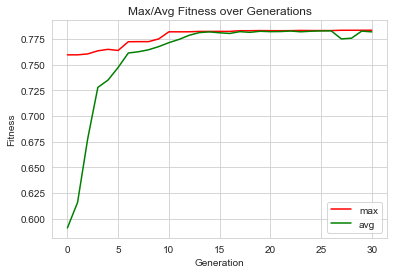

In [9]:
best_params = GAsimple()

### Simple Evolutionary Algorithm with Elitism mechanism

In [10]:
def eaSimpleWithElitism(population, toolbox, cxpb, mutpb, ngen, stats=None,
             halloffame=None, verbose=__debug__):
    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is None:
        raise ValueError("halloffame parameter must not be empty!")

    halloffame.update(population)
    hof_size = len(halloffame.items) if halloffame.items else 0

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):

        # Select the next generation individuals
        offspring = toolbox.select(population, len(population) - hof_size)

        # Vary the pool of individuals
        offspring = algorithms.varAnd(offspring, toolbox, cxpb, mutpb)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # add the best back to population:
        offspring.extend(halloffame.items)

        # Update the hall of fame with the generated individuals
        halloffame.update(offspring)

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

    return population, logbook

In [11]:
# def GAelitism():
#     population = toolbox.populationCreator(n=POPULATION_SIZE)

#     stats = tools.Statistics(lambda ind: ind.fitness.values)
#     stats.register("max", np.max)
#     stats.register("avg", np.mean)

#     hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

#     print("Training...")
#     population, logbook = eaSimpleWithElitism(
#         population=population,
#         toolbox=toolbox,
#         cxpb=P_CROSSOVER,
#         mutpb=P_MUTATION,
#         ngen=MAX_GENERATIONS,
#         stats=stats,
#         halloffame=hof,
#         verbose=True
#     )

#     print("- Best solution:", tuning.formatParams(hof.items[0]))
#     print("- Best accuracy:", hof.items[0].fitness.values[0])

#     maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

#     sns.set_style("whitegrid")
#     plt.plot(maxFitnessValues, color='red', label='max')
#     plt.plot(meanFitnessValues, color='green', label='avg')
#     plt.xlabel("Generation")
#     plt.ylabel("Fitness")
#     plt.title("Max/Avg Fitness over Generations")
#     plt.legend()
#     plt.show()

#     return tuning.convertParams(hof.items[0])

In [17]:
# best_params = GAelitism()

In [13]:
X = train.iloc[:, 1:]
y = train.iloc[:, 0]

xgb = GradientBoostingClassifier(
    random_state=RANDOM_SEED,
    loss=best_params[0],
    learning_rate=best_params[1],
    n_estimators=best_params[2],
    subsample=best_params[3],
    criterion=best_params[4],
    min_samples_split=best_params[5],
    min_samples_leaf=best_params[6],
    min_weight_fraction_leaf=best_params[7],            
    max_depth=best_params[8],
    min_impurity_decrease=best_params[9],
    max_features=best_params[10],
    max_leaf_nodes=best_params[11],
    ccp_alpha=best_params[12],
).fit(X, y)

submission['Survived'] = xgb.predict(test).astype(int)
submission

,PassengerId,Survived
0,100000,0
1,100001,1
2,100002,1
3,100003,0
4,100004,1
...,...,...
99995,199995,1
99996,199996,0
99997,199997,0
99998,199998,1
